In [1]:
from selenium import webdriver
import pandas as pd

In [26]:
browser = webdriver.Chrome('chromedriver.exe')
url = 'https://www.linkedin.com/jobs/search/?keywords=data+science&location=&locationId=PLACES%2Ein%2E16-0&originalSubdomain=in'


In [43]:
browser.get(url)

In [44]:
parent = browser.find_elements_by_css_selector('li.jobs-search-result-item[itemprop="itemListElement"]')
len(parent)

25

In [45]:
def find(tag,selector):
    try:
        return tag.find_element_by_css_selector(selector).text
    except:
        return ""

In [46]:
linkedin_jobs_df = pd.DataFrame()
num = 0
while(1):
    url='https://in.linkedin.com/jobs/data-science-jobs-bengaluru-ka?location=Bengaluru%2C%20KA&pageNum=2&locationId=PLACES.in.16-0&keywords=data%20science&position=1&count=25&start='+str(num)
    browser.get(url)
    parent_tag = browser.find_element_by_css_selector('div.jobs-search-content__results-scrollable')
    jobs = parent_tag.find_elements_by_css_selector('div.listed-job-posting__content')

    for tag in jobs:
        job_list = {
            "Designation " : find(tag,'h3.listed-job-posting__title'),
            "Company name": find(tag,'h4.listed-job-posting__company'),
            "Location": find(tag,'p.listed-job-posting__location'),
            "Date Posted": find(tag,'span.posted-time-ago__text'),
            "Job Description" : find(tag,'p.listed-job-posting__description')
        }
        linkedin_jobs_df = linkedin_jobs_df.append(job_list, ignore_index=True)
    try:
        if num < 99:
            num =num + 25
        else:
            break;
    except:
        break;

linkedin_jobs_df.head()

,Company name,Date Posted,Designation,Job Description,Location
0,Amazon,2 hours ago,Senior Data Scientist,"If you have experience with AI, including buil...",Bengaluru
1,Gambit Sports,2 weeks ago,Data Scientist,We are looking for a data scientist who will b...,Anekal
2,"Group 42, Inc.",1 month ago,Data Science Engineer,2+ years' experience in AI and ML algorithm de...,Bengaluru
3,IBM India Private Limited,6 days ago,Data Science Specialist,Required Technical and Professional Expertise ...,Bengaluru
4,Accenture in India,1 day ago,Data Science Specialist,This role will be based in Bangalore.We are lo...,Bengaluru


In [51]:
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [52]:
stop_wrd = set(stopwords.words('english'))

In [53]:
review = linkedin_jobs_df[['Job Description']]
review.head(3)

,Job Description
0,"If you have experience with AI, including buil..."
1,We are looking for a data scientist who will b...
2,2+ years' experience in AI and ML algorithm de...


In [54]:
review['count'] = review['Job Description'].apply(lambda x : len(str(x).split(" ")))
review.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Job Description,count
0,"If you have experience with AI, including buil...",27
1,We are looking for a data scientist who will b...,25
2,2+ years' experience in AI and ML algorithm de...,22
3,Required Technical and Professional Expertise ...,19
4,This role will be based in Bangalore.We are lo...,21


In [55]:
review['clean_text']=review['Job Description'].str.lower().str.replace('[^a-z ]','')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
stop=stopwords.words('english')

stop.extend(['If','in'])

def stop_wrd(review):                                                  
    review=[word for word in review.split() if word not in stop]          # all the words that are not in 
    return " ".join(review)

review['text without stopwords']=review['clean_text'].apply(stop_wrd)
review.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Job Description,count,clean_text,text without stopwords
0,"If you have experience with AI, including buil...",27,if you have experience with ai including build...,experience ai including building ml dl models ...
1,We are looking for a data scientist who will b...,25,we are looking for a data scientist who will b...,looking data scientist directly working produc...
2,2+ years' experience in AI and ML algorithm de...,22,years experience in ai and ml algorithm devel...,years experience ai ml algorithm development e...
3,Required Technical and Professional Expertise ...,19,required technical and professional expertise ...,required technical professional expertise mini...
4,This role will be based in Bangalore.We are lo...,21,this role will be based in bangalorewe are loo...,role based bangalorewe looking someone compreh...


In [57]:
count_vectorizer = CountVectorizer()

# fit the count vectorizer using the text data

count_vectorizer.fit(review["text without stopwords"])

# collect the vocabulary items used in the vectorizer

dictionary = count_vectorizer.vocabulary_.items()

In [58]:
# Creating DTM

X = count_vectorizer.fit_transform(review['text without stopwords'])

# Converting a DTM to a DTM data frame

DTM = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())

DTM.head()

# Word and they freq

word_count_freq = DTM.sum()

#word_count_freq.sort_values(ascending=False)
Word_table = pd.DataFrame(word_count_freq).reset_index()

Word_table = Word_table.rename(columns={"index" : 'Word', 0 : "Freq"})

Word_table.sort_values(by = 'Freq', ascending = False).head()

,Word,Freq
119,data,81
208,experience,70
343,looking,37
538,skills,29
666,years,25


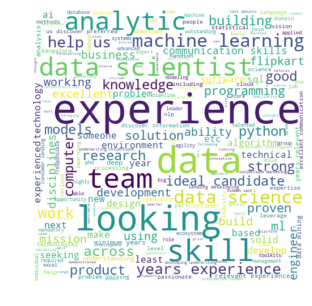

In [59]:
input_string = ' '.join(review['text without stopwords'])
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="white").generate(input_string)


plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [47]:
companies = linkedin_jobs_df.groupby('Company name').size().reset_index()
companies.head()

,Company name,0
0,3D-IP Semiconductors,1
1,ABB,1
2,AIG,1
3,Accenture,2
4,Accenture in India,1


In [48]:
linkedin_jobs_df.groupby('Company name').size().nlargest(5).reset_index()

,Company name,0
0,Walmart Labs India,5
1,Allstate India,4
2,Amazon,3
3,FICO,3
4,Flipkart,3


In [49]:
location = linkedin_jobs_df.groupby('Location').size().reset_index()


In [50]:
linkedin_jobs_df.groupby('Location').size().nlargest(3).reset_index()

,Location,0
0,Bengaluru,109
1,Anekal,8
2,"SJR Towers, 27, Bannerghatta Main Rd, JP Nagar...",2
